## Introduction
Employee resignation happens everyday. Resignation is a difficult decision because it has a huge impact on an employee's livelihood, especially if they have a family. Despite that, the number of resignation increases every year. 

In this notebook we will analyze a sample HR analytics dataset to find out some facts on employee resignation, and will attempt to create a classifier model to predict whether an employee with a specific profile may resign or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HR_data.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<AxesSubplot:>

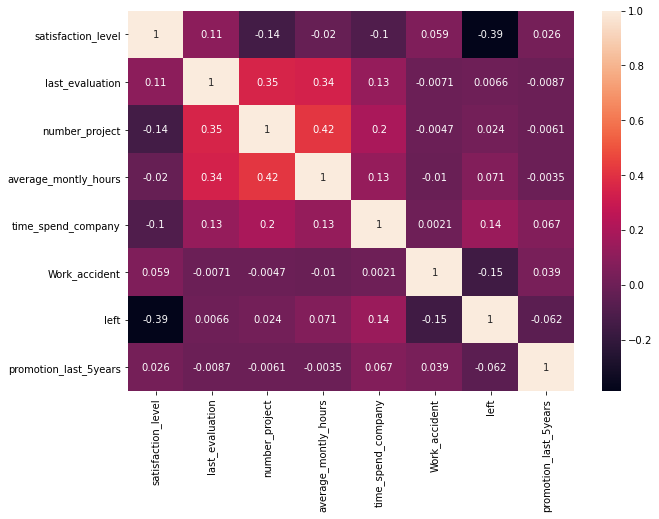

In [6]:
plt.figure(figsize = (10, 7))
sns.heatmap(data.corr(), annot=True)

In [7]:
left = data[data['left'] == 1]
left.shape

(3571, 10)

In [8]:
retained = data[data['left'] == 0]
retained.shape

(11428, 10)

In [9]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


We can see that satisfaction level is about 66,7% in employees staying in the company. Average monthly hours are higher in 
retained employees. Retained employees have suffered less work accidents and have been given a promotion in the last 5 years.

<AxesSubplot:xlabel='salary', ylabel='Count'>

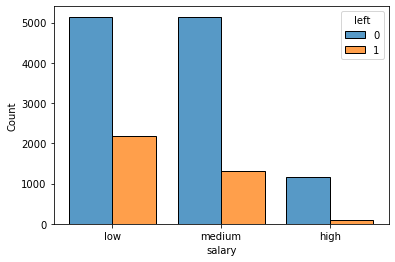

In [10]:
# Impact of salary on employee retention

sns.histplot(data = data, x = 'salary', hue = 'left', multiple ='dodge', shrink=.8)

Employees with high salaries are likely to stay in the company.

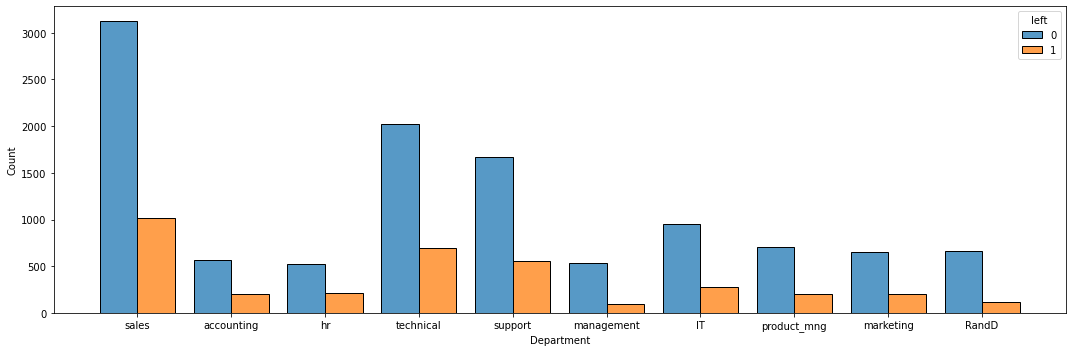

In [11]:
# Department wise employee retention rate
plt.figure(figsize = (15, 5))
sns.histplot(data = data, x = 'Department', hue = 'left', multiple ='dodge', shrink=.8)
plt.tight_layout()

Department doesn't show an important impact in the decission of leaving the company

In [12]:
# As we have categorical features we have to transform them to dummy variables in order to create the model.


dummies1 = pd.get_dummies(data.salary)
dummies1 = dummies1.drop('low', axis=1)
dummies1.head()

,high,medium
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0


In [13]:
data.drop('salary', axis = 1, inplace = True)

In [14]:
dummies2 = pd.get_dummies(data.Department)
dummies2 = dummies2.drop('sales', axis=1)
dummies2.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [15]:
data = data.drop('Department', axis = 1)
data = pd.concat([data, dummies1, dummies2], axis = 'columns')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,medium,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
X = data.drop('left', axis = 1)
y = data['left']

In [17]:
# We have features with different scale. It's advisable to rescale them before creating the model. 
# This will be done with StandardScaler

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

X = StandardScaler().fit_transform(X.astype(float))
X

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.25295305,
         2.39353848, -0.4706553 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.25295305,
         2.39353848, -0.4706553 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.25295305,
         2.39353848, -0.4706553 ]])

In [18]:
# We create our train/test data to perform a LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2)

print('Train shape: ', X_train.shape, y_train.shape)
print('Test shape: ', X_test.shape, y_test.shape)

Train shape:  (10049, 18) (10049,)
Test shape:  (4950, 18) (4950,)


In [19]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.425845
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                10049
Model:                          Logit   Df Residuals:                    10030
Method:                           MLE   Df Model:                           18
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                  0.2187
Time:                        12:07:35   Log-Likelihood:                -4279.3
converged:                       True   LL-Null:                       -5477.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5989      0.033    -48.379      0.000      -1.664      -1.534
x1            -1.0412      0.

In [20]:
# Predictions
# ==============================================================================
pred = modelo.predict(exog = X_train)

# Predicted clasification
# ==============================================================================
clasification = np.where(pred<0.5, 0, 1)
clasification

array([0, 1, 0, ..., 0, 0, 0])

In [21]:
# Model test accuracy 
# ==============================================================================
from sklearn.metrics import accuracy_score

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"Test accuracy is: {100*accuracy}%")


Test accuracy is: 78.48484848484848%


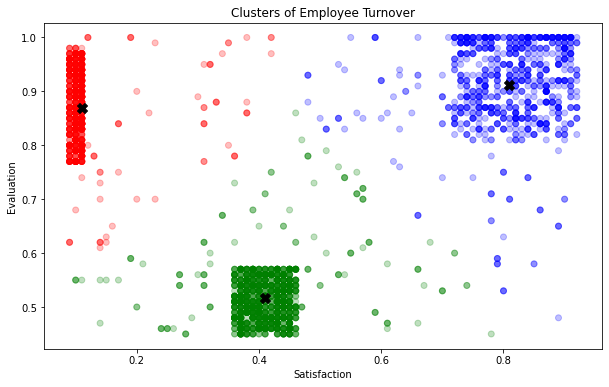

In [22]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(data[data.left==1][["satisfaction_level","last_evaluation"]])

kmeans_colors = ['red' if c == 0 else 'blue' if c == 2 else 'green' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=data[data.left==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

According to the Likelihood ratio (p-value=0), the model created to predict if an employee will left the company is statistically 
significant. The percentage of a correct classification in the test set is 78.5%. In the statsmodels report we can see some
predictor don't add information to the model, so we can eliminate them to simplify the model.